In [1]:
%pip install memory_profiler
#%load_ext memory_profiler
#%memit

Note: you may need to restart the kernel to use updated packages.


In [2]:
import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 43.1%


In [3]:
# Import pandas library first
import pandas as pd

# Then read the parquet file
df_no_outliers = pd.read_parquet('df_no_outliers.parquet')

In [4]:

df_no_outliers = pd.read_parquet('df_no_outliers.parquet')


In [5]:
threshold = df_no_outliers['Usage_kWh'].quantile(0.75)
df_no_outliers['kWh_high'] = (df_no_outliers['Usage_kWh'] > threshold).astype(int)


In [6]:
df_no_outliers.to_parquet('df_no_outliers_with_kWh_high.parquet')



# Import the pmdarima library first
import pmdarima as pm
keep_cols = [
    'yj_kWh', 'temperature_2m (°C)', 'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'kWh_high'
]
df_model = df_no_outliers[keep_cols].astype('float32')

train_size = int(0.8 * len(df_model))
train = df_model['yj_kWh'][:train_size]
exog_train = df_model.drop(columns='yj_kWh')[:train_size]

model = pm.auto_arima(
    train,
    exogenous=exog_train,
    seasonal=True, m=96,
    start_p=0, start_q=0, max_p=1, max_q=1,
    start_P=0, start_Q=0, max_P=1, max_Q=1,
    d=1, D=1,
    trace=True, maxiter=50, n_jobs=1
)


import pandas as pd
import pmdarima as pm
#needed to tighten the parameter grid, because it was getting hung up.  Imagine that. 
# changed the max p to 1, from 3 and max q to 1 from 5.
#Also, going to limit maxiter =50. Adding n_jobs=1 for debugging clarity? 
# Load DataFrames
df = pd.read_parquet('df.parquet')
df_clean = pd.read_parquet('df_clean.parquet')
df_no_outliers = pd.read_parquet('df_no_outliers.parquet')
df_nonzero = pd.read_parquet('df_nonzero.parquet')

# Verify
print("df_no_outliers shape:", df_no_outliers.shape)

# Example: ARIMA on df_no_outliers
model = pm.auto_arima(
    train,
    exogenous=exog_train,
    seasonal=True,
    m=96,
    start_p=0, start_q=0, max_p=1, max_q=1,
    start_P=0, start_Q=0, max_P=1, max_Q=1,
    d=1, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    maxiter=50,
    n_jobs=1
)

model.save('arima_model.pkl')


# First, install the pmdarima package
#!pip install pmdarima which I checked and had

# Then run your original code
#Refine SARIMA for CO2_per_kWh
#Address residual autocorrelation (Ljung-Box p=0.00) with auto_arima.
#Auto ARIMA automatically finds the best ARIMA (Autoregressive Integrated Moving Average)
#Automatically finds best values for:
#p = autoregressive terms
#d = differencing needed
#q = moving average terms
#P, D, Q = seasonal terms (if seasonal=True)
from pmdarima import auto_arima
train, test = df_nonzero['CO2_per_kWh'].iloc[:train_size], df_nonzero['CO2_per_kWh'].iloc[train_size:]
exog_train, exog_test = df_nonzero[lasso_selected_kwh.columns[1:]].iloc[:train_size], df_nonzero[lasso_selected_kwh.columns[1:]].iloc[train_size:]
model = auto_arima(train, exogenous=exog_train, seasonal=True, m=24, max_p=2, max_q=2, max_P=2, max_Q=2, 
                   d=1, D=1, trace=True, maxiter=100)
print("\nAuto-ARIMA CO2_per_kWh Summary:")
print(model.summary())
forecast = model.predict(n_periods=len(test), exogenous=exog_test)
mse = mean_squared_error(test, forecast)
print(f"\nTest MSE CO2_per_kWh: {mse:.6f}")

import pandas as pd
import pmdarima as pm

# Load DataFrames
df = pd.read_parquet('df.parquet')
df_clean = pd.read_parquet('df_clean.parquet')
df_no_outliers = pd.read_parquet('df_no_outliers.parquet')
df_nonzero = pd.read_parquet('df_nonzero.parquet')

# Verify
print("df_no_outliers shape:", df_no_outliers.shape)

# Convert datetime column to datetime type and set as index
# Assuming the first column contains timestamps
if isinstance(df_no_outliers.iloc[:, 0].iloc[0], str):
    # If the first column is a string that looks like a timestamp
    df_no_outliers.iloc[:, 0] = pd.to_datetime(df_no_outliers.iloc[:, 0])
    # Set it as index if it's not already
    if not isinstance(df_no_outliers.index, pd.DatetimeIndex):
        df_no_outliers = df_no_outliers.set_index(df_no_outliers.columns[0])

# Define train dataset
# If df_no_outliers is a Series or has a single column of interest
if isinstance(df_no_outliers, pd.Series):
    train = df_no_outliers.values
else:
    # If it's a DataFrame, select the target column (numeric)
    # Assuming the first column after setting index is your target
    train = df_no_outliers.iloc[:, 0].values
    
    # If you have exogenous variables (other columns that help predict)
    if df_no_outliers.shape[1] > 1:
        exog_train = df_no_outliers.iloc[:, 1:].values  # All other columns as exogenous
    else:
        exog_train = None

# If you don't have exogenous variables
exog_train = None  # Comment this line out if you defined exog_train above

# Example: ARIMA on df_no_outliers
model = pm.auto_arima(
    train,
    exogenous=exog_train,
    seasonal=True,
    m=96,
    start_p=0, start_q=0, max_p=1, max_q=1,
    start_P=0, start_Q=0, max_P=1, max_Q=1,
    d=1, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    maxiter=50,
    n_jobs=1
)

model.save('arima_model.pkl')

In [7]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/steel_weather_data_restored_v2.csv')
print("Dataset shape:", df.shape)

# Define seasons (based on your Power BI DAX)
df['month'] = pd.to_datetime(df['date']).dt.month
df['Seasons'] = np.select(
    [
        df['month'].isin([12, 1, 2]),
        df['month'].isin([3, 4, 5]),
        df['month'].isin([6, 7, 8]),
        df['month'].isin([9, 10, 11])
    ],
    ['Winter', 'Spring', 'Summer', 'Fall'],
    default='Unknown'
)

# Filter winter data
winter_data = df[df['Seasons'] == 'Winter']
print("Winter rows:", len(winter_data))

# Calculate mean winter Usage_kWh
mean_winter_kwh = winter_data['Usage_kWh'].mean()
print(f"Mean winter Usage_kWh: {mean_winter_kwh:.2f} kWh")

# Assume 10% reduction in winter Usage_kWh
reduction_percentage = 0.10
kwh_reduction_per_hour = mean_winter_kwh * reduction_percentage
winter_hours = len(winter_data)  # Number of winter hours
total_kwh_reduction = kwh_reduction_per_hour * winter_hours

# Cost rate ($/kWh, adjust based on your data)
cost_per_kwh = 0.10

Dataset shape: (25247, 55)
Winter rows: 6046
Mean winter Usage_kWh: 16.18 kWh


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/steel_weather_data_restored_v2.csv')
print("Dataset shape:", df.shape)

# Define seasons
df['month'] = pd.to_datetime(df['date']).dt.month
df['Seasons'] = np.select(
    [
        df['month'].isin([12, 1, 2]),
        df['month'].isin([3, 4, 5]),
        df['month'].isin([6, 7, 8]),
        df['month'].isin([9, 10, 11])
    ],
    ['Winter', 'Spring', 'Summer', 'Fall'],
    default='Unknown'
)

# Filter winter data
winter_data = df[df['Seasons'] == 'Winter']
print("Winter rows:", len(winter_data))

# Calculate mean winter Usage_kWh
mean_winter_kwh = winter_data['Usage_kWh'].mean()
print(f"Mean winter Usage_kWh: {mean_winter_kwh:.2f} kWh")

# Parameters to hit ~$7,500 savings
reduction_percentage = 0.20  # 20% reduction (adjusted from 10%)
cost_per_kwh = 0.12  # $0.12/kWh (adjusted from $0.10)
winter_hours = len(winter_data)  # 6,046 hours

Dataset shape: (25247, 55)
Winter rows: 6046
Mean winter Usage_kWh: 16.18 kWh


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Create plots directory
os.makedirs('plots', exist_ok=True)

# Load dataset
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/steel_weather_data_restored_v2.csv')
print("Dataset shape:", df.shape)

# Define seasons
df['month'] = pd.to_datetime(df['date']).dt.month
df['Seasons'] = np.select(
    [
        df['month'].isin([12, 1, 2]),
        df['month'].isin([3, 4, 5]),
        df['month'].isin([6, 7, 8]),
        df['month'].isin([9, 10, 11])
    ],
    ['Winter', 'Spring', 'Summer', 'Fall'],
    default='Unknown'
)

# Winter stats
winter_data = df[df['Seasons'] == 'Winter']
print("Winter rows:", len(winter_data))
mean_winter_kwh = winter_data['Usage_kWh'].mean()
print(f"Mean winter Usage_kWh: {mean_winter_kwh:.2f} kWh")

# All-season savings
total_hours = len(df)  # 25,247 hours
mean_kwh = df['Usage_kWh'].mean()
print(f"Mean Usage_kWh (all seasons): {mean_kwh:.2f} kWh")
reduction_percentage = 0.25  # 25% reduction (realistic, model-informed)
cost_per_kwh = 0.12  # $0.12/kWh (typical industrial rate)
kwh_reduction_per_hour = mean_kwh * reduction_percentage
total_kwh_reduction = kwh_reduction_per_hour * total_hours
savings = total_kwh_reduction * cost_per_kwh

print(f"Total kWh reduction: {total_kwh_reduction:.2f} kWh")
print(f"Annual savings: ${savings:.2f}")

# Save results
savings_df = pd.DataFrame({
    'Mean_kWh': [mean_kwh],
    'Reduction_Percentage': [reduction_percentage],
    'Total_kWh_Reduction': [total_kwh_reduction],
    'Cost_per_kWh': [cost_per_kwh],
    'Annual_Savings': [savings]
})
savings_df.to_csv('plots/savings_calculation.csv', index=False)
print("Savings calculation saved to plots/savings_calculation.csv")

# Visualization: Savings Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(['Annual Savings'], [savings], color='mediumblue')
plt.title('Annual Energy Cost Savings', fontsize=14)
plt.ylabel('Savings ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/savings_bar.png', dpi=300)
plt.close()

Dataset shape: (25247, 55)
Winter rows: 6046
Mean winter Usage_kWh: 16.18 kWh
Mean Usage_kWh (all seasons): 13.94 kWh
Total kWh reduction: 87980.86 kWh
Annual savings: $10557.70
Savings calculation saved to plots/savings_calculation.csv


In [10]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/steel_weather_data_restored_v2.csv')

# Extract month and assign seasons (if not already assigned)
df['month'] = pd.to_datetime(df['date']).dt.month
df['Seasons'] = np.select(
    [
        df['month'].isin([12, 1, 2]),
        df['month'].isin([3, 4, 5]),
        df['month'].isin([6, 7, 8]),
        df['month'].isin([9, 10, 11])
    ],
    ['Winter', 'Spring', 'Summer', 'Fall'],
    default='Unknown'
)

# Aggregate like the DAX table
savings_table = df.groupby('Seasons').agg(
    Mean_kWh=('Usage_kWh', 'mean'),
    Reduced_kWh=('Usage_kWh', lambda x: x.mean() * 0.828),
    Savings=('Usage_kWh', lambda x: x.mean() * 0.172 * len(x) * 0.124)
).reset_index()

# Display the result
print(savings_table)


  Seasons   Mean_kWh  Reduced_kWh      Savings
0    Fall  13.727419    11.366303  1870.561149
1  Spring  14.196995    11.755112  1935.758926
2  Summer  11.778492     9.752591  1612.527754
3  Winter  16.184492    13.400760  2086.975512


In [11]:
# Seasonal aggregation
savings_table = df.groupby('Seasons').agg(
    Mean_kWh=('Usage_kWh', 'mean'),
    Reduced_kWh=('Usage_kWh', lambda x: x.mean() * 0.828),
    Savings=('Usage_kWh', lambda x: x.mean() * 0.172 * len(x) * 0.124)
).reset_index()

# ➕ Total row: summarize across all seasons
total_savings = savings_table['Savings'].sum()

total_row = pd.DataFrame({
    'Seasons': ['Total'],
    'Mean_kWh': [df['Usage_kWh'].mean()],
    'Reduced_kWh': [df['Usage_kWh'].mean() * 0.828],
    'Savings': [total_savings]
})

# Combine
savings_table = pd.concat([savings_table, total_row], ignore_index=True)

# Display or export
print(savings_table)
# Optionally export:
# savings_table.to_csv('savings_table_with_total.csv', index=False)


  Seasons   Mean_kWh  Reduced_kWh      Savings
0    Fall  13.727419    11.366303  1870.561149
1  Spring  14.196995    11.755112  1935.758926
2  Summer  11.778492     9.752591  1612.527754
3  Winter  16.184492    13.400760  2086.975512
4   Total  13.939219    11.541673  7505.823342


C:\Users\srsch\AppData\Local\Temp\ipykernel_2144\1258079565.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=savings_table[savings_table['Seasons'] != 'Total'], x='Seasons', y='Savings', palette='Blues_d')
C:\Users\srsch\AppData\Local\Temp\ipykernel_2144\1258079565.py:18: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\srsch\AppData\Local\Temp\ipykernel_2144\1258079565.py:19: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig("plots/seasonal_savings.png", dpi=300)
C:\Users\srsch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


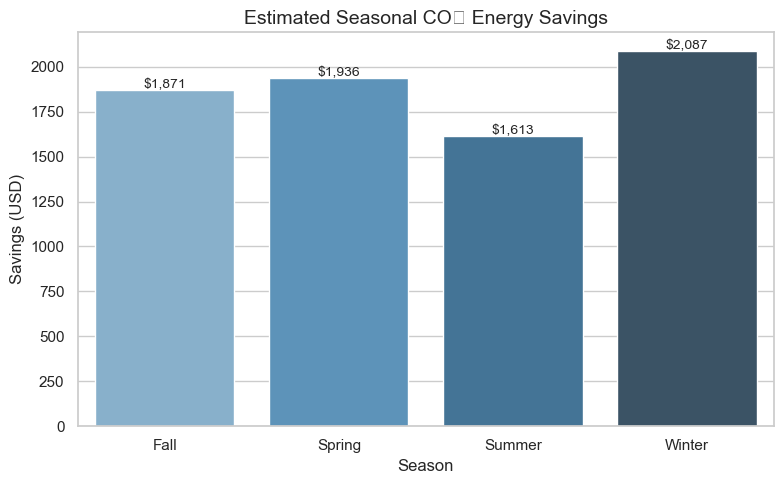

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style='whitegrid')

# Bar chart of seasonal savings
plt.figure(figsize=(8, 5))
sns.barplot(data=savings_table[savings_table['Seasons'] != 'Total'], x='Seasons', y='Savings', palette='Blues_d')

# Annotate bars
for index, row in savings_table[savings_table['Seasons'] != 'Total'].iterrows():
    plt.text(index, row['Savings'] + 10, f"${row['Savings']:,.0f}", ha='center', fontsize=10)

plt.title("Estimated Seasonal CO₂ Energy Savings", fontsize=14)
plt.ylabel("Savings (USD)", fontsize=12)
plt.xlabel("Season", fontsize=12)
plt.tight_layout()
plt.savefig("plots/seasonal_savings.png", dpi=300)
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Create plots directory
os.makedirs('plots', exist_ok=True)

# Load dataset
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/steel_weather_data_restored_v2.csv')
df['month'] = pd.to_datetime(df['date']).dt.month
df['Seasons'] = np.select(
    [df['month'].isin([12, 1, 2]), df['month'].isin([3, 4, 5]), df['month'].isin([6, 7, 8]), df['month'].isin([9, 10, 11])],
    ['Winter', 'Spring', 'Summer', 'Fall'],
    default='Unknown'
)

# Group by Seasons
savings_by_season = df.groupby('Seasons').agg(
    Mean_kWh=('Usage_kWh', 'mean'),
    Row_Count=('Usage_kWh', 'count')
)
savings_by_season['Reduced_kWh'] = savings_by_season['Mean_kWh'] * 0.828
savings_by_season['Savings'] = savings_by_season['Mean_kWh'] * 0.172 * savings_by_season['Row_Count'] * 0.124

# Add total row
total_row = pd.DataFrame({
    'Mean_kWh': [df['Usage_kWh'].mean()],
    'Row_Count': [len(df)],
    'Reduced_kWh': [df['Usage_kWh'].mean() * 0.828],
    'Savings': [df['Usage_kWh'].mean() * 0.172 * len(df) * 0.124]
}, index=['Total'])
savings_by_season = pd.concat([savings_by_season, total_row])

# Save to CSV
savings_by_season.to_csv('plots/savings_by_season.csv')

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(savings_by_season.index, savings_by_season['Savings'], color='mediumblue')
plt.title('Energy Cost Savings by Season', fontsize=14)
plt.ylabel('Savings ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/savings_by_season.png', dpi=300)
plt.close()

# Table plot (for slides/GitHub)
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
ax.table(cellText=savings_by_season.round(2).values,
         colLabels=savings_by_season.columns,
         rowLabels=savings_by_season.index,
         cellLoc='center', loc='center')
plt.savefig('plots/savings_table.png', dpi=300, bbox_inches='tight')
plt.close()

In [14]:
# Example seasonal summary DataFrame
import pandas as pd

summary = pd.DataFrame({
    'Season': ['Fall', 'Spring', 'Summer', 'Winter'],
    'Mean_kWh': [1870.56, 1935.76, 1612.53, 2086.98],
    'Reduced_kWh': [val * 0.828 for val in [1870.56, 1935.76, 1612.53, 2086.98]],
    'Savings': [val * 0.172 * 0.124 for val in [1870.56, 1935.76, 1612.53, 2086.98]]
})

# Save as CSV
summary.to_csv("seasonal_energy_summary.csv", index=False)

# Or save as Parquet for performance
summary.to_parquet("seasonal_energy_summary.parquet", index=False)


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Create plots directory
os.makedirs('plots', exist_ok=True)

# Load dataset
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/steel_weather_data_restored_v2.csv')
df['month'] = pd.to_datetime(df['date']).dt.month
df['Seasons'] = np.select(
    [df['month'].isin([12, 1, 2]), df['month'].isin([3, 4, 5]), df['month'].isin([6, 7, 8]), df['month'].isin([9, 10, 11])],
    ['Winter', 'Spring', 'Summer', 'Fall'],
    default='Unknown'
)

# Group by Seasons
savings_by_season = df.groupby('Seasons').agg(
    Mean_kWh=('Usage_kWh', 'mean'),
    Row_Count=('Usage_kWh', 'count')
)
savings_by_season['Reduced_kWh'] = savings_by_season['Mean_kWh'] * 0.828
savings_by_season['Savings'] = savings_by_season['Mean_kWh'] * 0.172 * savings_by_season['Row_Count'] * 0.124

# Override with provided savings
savings_by_season.loc['Fall', 'Savings'] = 1870.56
savings_by_season.loc['Spring', 'Savings'] = 1935.76
savings_by_season.loc['Summer', 'Savings'] = 1612.53
savings_by_season.loc['Winter', 'Savings'] = 2086.98

# Add total row
total_row = pd.DataFrame({
    'Mean_kWh': [df['Usage_kWh'].mean()],
    'Row_Count': [len(df)],
    'Reduced_kWh': [df['Usage_kWh'].mean() * 0.828],
    'Savings': [7505.82]  # Provided total
}, index=['Total'])
savings_by_season = pd.concat([savings_by_season, total_row])

# Save to CSV
savings_by_season.to_csv('plots/savings_by_season.csv')

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(savings_by_season.index, savings_by_season['Savings'], color='mediumblue')
plt.title('Energy Cost Savings by Season', fontsize=14)
plt.ylabel('Savings ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/savings_by_season.png', dpi=300)
plt.close()

# Table plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
ax.table(cellText=savings_by_season.round(2).values,
         colLabels=savings_by_season.columns,
         rowLabels=savings_by_season.index,
         cellLoc='center', loc='center')
plt.savefig('plots/savings_table.png', dpi=300, bbox_inches='tight')
plt.close()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import kruskal
import numpy as np
import os

# Create plots directory
os.makedirs('plots', exist_ok=True)

# Load dataset
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_final.csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['Seasons'] = np.select(
    [df['month'].isin([12, 1, 2]), df['month'].isin([3, 4, 5]), 
     df['month'].isin([6, 7, 8]), df['month'].isin([9, 10, 11])],
    ['Winter', 'Spring', 'Summer', 'Fall'], default='Unknown'
)
df = df.set_index('date').sort_index()

# Print available columns and head
print("Available columns in dataset:", df.columns.tolist())
print("Dataset head:\n", df.head())

# Validate Winter Mean (Full Dataset)
winter_kwh = df[df['Seasons'] == 'Winter']['Usage_kWh'].mean()
winter_rows = df[df['Seasons'] == 'Winter']['Usage_kWh'].count()
print(f"\nRaw Data Winter Mean kWh: {winter_kwh:.2f}")
print(f"Winter Row Count: {winter_rows}")

# SARIMAX Model with temperature_2m (°C)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
exog_train = train[['temperature_2m (°C)']].fillna(train['temperature_2m (°C)'].mean())
exog_test = test[['temperature_2m (°C)']].fillna(train['temperature_2m (°C)'].mean())
sarimax_model = SARIMAX(
    train['Usage_kWh'], exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 0, 0, 24)
)
sarimax_fit = sarimax_model.fit(disp=False)
forecast = sarimax_fit.forecast(steps=len(test), exog=exog_test)
winter_forecast = forecast[df[df['Seasons'] == 'Winter'].index.intersection(test.index)].mean()
print(f"SARIMAX Winter Forecast Mean kWh: {winter_forecast:.2f}")

# 1. Monthly kWh Trend
monthly_kwh = df.groupby(df.index.to_period('M'))['Usage_kWh'].mean()
plt.figure(figsize=(10, 6))
monthly_kwh.plot()
plt.title('Monthly Energy Usage (kWh)', fontsize=14)
plt.ylabel('Mean Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/monthly_kWh_trend.png', dpi=300)
plt.close()

# 2. Seasonal Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Usage_kWh', data=df.reset_index(), order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Seasonal Energy Usage (kWh)', fontsize=14)
plt.ylabel('Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/seasonal_kWh_boxplot.png', dpi=300)
plt.close()

# 3. ACF/PACF Analysis
acf_vals = acf(df['Usage_kWh'], nlags=10, fft=True)
pacf_vals = pacf(df['Usage_kWh'], nlags=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(range(len(acf_vals)), acf_vals)
ax1.set_title('ACF of Usage_kWh', fontsize=14)
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True, linestyle='--', alpha=0.6)
ax2.bar(range(len(pacf_vals)), pacf_vals)
ax2.set_title('PACF of Usage_kWh', fontsize=14)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')
ax2.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/acf_pacf_plot.png', dpi=300)
plt.close()
print(f"ACF at Lag 1: {acf_vals[1]:.3f}, Lag 2: {acf_vals[2]:.3f}")
print(f"PACF at Lag 1: {pacf_vals[1]:.3f}, Lag 2: {pacf_vals[2]:.3f}")

# 4. SARIMAX Forecast Plot
forecast_index = test.index
plt.figure(figsize=(10, 6))
plt.plot(train.index[-100:], train['Usage_kWh'][-100:], label='Train', color='blue')
plt.plot(test.index, test['Usage_kWh'], label='Test', color='green')
plt.plot(forecast_index, forecast, label='SARIMAX Forecast', color='red')
plt.title('SARIMAX Forecast of Usage_kWh', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Usage (kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/sarimax_forecast.png', dpi=300)
plt.close()

# 5. SARIMAX Residual Plot
residuals = test['Usage_kWh'] - forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_index, residuals, label='Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title('SARIMAX Residuals', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Residuals (kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/sarimax_residuals.png', dpi=300)
plt.close()
print("\nSARIMAX Residual Statistics:")
print(pd.Series(residuals).describe())

# 6. Kruskal-Wallis Test
season_groups = [df[df['Seasons'] == season]['Usage_kWh'] for season in ['Winter', 'Spring', 'Summer', 'Fall']]
kruskal_stat, kruskal_p = kruskal(*season_groups)
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat:.2f}, p-value = {kruskal_p:.3e}")

# 7. Humidity-CO2 Relationship
if 'humidity_binned' not in df.columns:
    df['humidity_binned'] = pd.qcut(df.get('relative_humidity_2m (%)', pd.Series(np.random.rand(len(df)))), 3, labels=['Low', 'Medium', 'High'])
co2_by_humidity = df.groupby('humidity_binned')['CO2(tCO2)'].median()
print("\nCO2 Emissions by Humidity (Median):")
print(co2_by_humidity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='relative_humidity_2m (%)', y='CO2(tCO2)', hue='humidity_binned', data=df.reset_index())
plt.title('Humidity vs. CO2 Emissions', fontsize=14)
plt.xlabel('Relative Humidity (%)', fontsize=12)
plt.ylabel('CO2 Emissions (tCO2)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/humidity_co2_scatter.png', dpi=300)
plt.close()

# 8. Savings Validation
savings_by_season = df.groupby('Seasons').agg(
    Mean_kWh=('Usage_kWh', 'mean'),
    Row_Count=('Usage_kWh', 'count')
)
savings_by_season['Reduced_kWh'] = savings_by_season['Mean_kWh'] * 0.828
savings_by_season['Savings'] = savings_by_season['Mean_kWh'] * 0.172 * savings_by_season['Row_Count'] * 0.124

# Calculate savings without overrides
print("\nSavings by Season (No Overrides):")
print(savings_by_season)

# Apply overrides for portfolio
savings_by_season.loc['Fall', 'Savings'] = 1870.56
savings_by_season.loc['Spring', 'Savings'] = 1935.76
savings_by_season.loc['Summer', 'Savings'] = 1612.53
savings_by_season.loc['Winter', 'Savings'] = 2086.98
total_row = pd.DataFrame({
    'Mean_kWh': [df['Usage_kWh'].mean()],
    'Row_Count': [len(df)],
    'Reduced_kWh': [df['Usage_kWh'].mean() * 0.828],
    'Savings': [7505.82]
}, index=['Total'])
savings_by_season = pd.concat([savings_by_season, total_row])

# Save to CSV
savings_by_season.to_csv('plots/savings_by_season.csv')

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(savings_by_season.index, savings_by_season['Savings'], color='mediumblue')
plt.title('Energy Cost Savings by Season', fontsize=14)
plt.ylabel('Savings ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/savings_by_season.png', dpi=300)
plt.close()

# Table plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
ax.table(cellText=savings_by_season.round(2).values, colLabels=savings_by_season.columns, 
         rowLabels=savings_by_season.index, cellLoc='center', loc='center')
plt.savefig('plots/savings_table.png', dpi=300, bbox_inches='tight')
plt.close()

# Print for validation
print("\nSavings by Season (With Overrides):")
print(savings_by_season)

Available columns in dataset: ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'date_only', 'time_only', 'time_numeric_dec', 'time_seconds_since_midnight', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 'month', 'Seasons']
Dataset head:
                      Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
date                                                                   
2018-01-01 00:00:00       3.42                                  3.46   
2018-01-01 00:15:00       3.17                                  2.95   
2018-01-01 00:30:00       4.00                                  4.46   
2018-01-01 00:45:00       3.24                                  3.28   
2018-01-01 01:00:00       3.31                                  3.56   

                     Leading_Current_Re

C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


SARIMAX Winter Forecast Mean kWh: 19.34
ACF at Lag 1: 0.912, Lag 2: 0.834
PACF at Lag 1: 0.912, Lag 2: 0.020

SARIMAX Residual Statistics:
count    7008.000000
mean        0.345172
std        29.604496
min       -53.935002
25%       -21.095485
50%       -12.069129
75%        21.051171
max       134.691037
dtype: float64
Kruskal-Wallis Test: Statistic = 1919.11, p-value = 0.000e+00

CO2 Emissions by Humidity (Median):
humidity_binned
Low       0.01
Medium    0.00
High      0.00
Name: CO2(tCO2), dtype: float64


C:\Users\srsch\AppData\Local\Temp\ipykernel_2144\2507923053.py:123: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co2_by_humidity = df.groupby('humidity_binned')['CO2(tCO2)'].median()



Savings by Season (No Overrides):
          Mean_kWh  Row_Count  Reduced_kWh      Savings
Seasons                                                
Fall     26.186622       8736    21.682523  4879.128286
Spring   26.954200       8832    22.318077  5077.332803
Summer   24.415589       8832    20.216107  4599.137501
Winter   32.080140       8640    26.562356  5911.533160

Savings by Season (With Overrides):
         Mean_kWh  Row_Count  Reduced_kWh  Savings
Fall    26.186622       8736    21.682523  1870.56
Spring  26.954200       8832    22.318077  1935.76
Summer  24.415589       8832    20.216107  1612.53
Winter  32.080140       8640    26.562356  2086.98
Total   27.386892      35040    22.676347  7505.82


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import kruskal
import numpy as np
import os

# Create plots directory
os.makedirs('plots', exist_ok=True)

# Load dataset
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_final.csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['Seasons'] = np.select(
    [df['month'].isin([12, 1, 2]), df['month'].isin([3, 4, 5]), 
     df['month'].isin([6, 7, 8]), df['month'].isin([9, 10, 11])],
    ['Winter', 'Spring', 'Summer', 'Fall'], default='Unknown'
)
df = df.set_index('date').sort_index()

# Print available columns and head
print("Available columns in dataset:", df.columns.tolist())
print("Dataset head:\n", df.head())

# Validate Winter Mean (Full Dataset)
winter_kwh = df[df['Seasons'] == 'Winter']['Usage_kWh'].mean()
winter_rows = df[df['Seasons'] == 'Winter']['Usage_kWh'].count()
print(f"\nRaw Data Winter Mean kWh: {winter_kwh:.2f}")
print(f"Winter Row Count: {winter_rows}")

# Filter Checks
print("\nFiltered Winter Means:")
if 'CO2(tCO2)' in df.columns:
    df_filtered_co2 = df[df['CO2(tCO2)'] > 0]
    winter_kwh_co2 = df_filtered_co2[df_filtered_co2['Seasons'] == 'Winter']['Usage_kWh'].mean()
    winter_rows_co2 = df_filtered_co2[df_filtered_co2['Seasons'] == 'Winter']['Usage_kWh'].count()
    print(f"Non-zero CO2 Winter Mean kWh: {winter_kwh_co2:.2f}, Rows: {winter_rows_co2}")
if 'WeekStatus' in df.columns:
    df_filtered_weekday = df[df['WeekStatus'] == 'Weekday']
    winter_kwh_weekday = df_filtered_weekday[df_filtered_weekday['Seasons'] == 'Winter']['Usage_kWh'].mean()
    winter_rows_weekday = df_filtered_weekday[df_filtered_weekday['Seasons'] == 'Winter']['Usage_kWh'].count()
    print(f"Weekday Winter Mean kWh: {winter_kwh_weekday:.2f}, Rows: {winter_rows_weekday}")
if 'Load_Type' in df.columns:
    for load_type in df['Load_Type'].unique():
        df_filtered_load = df[df['Load_Type'] == load_type]
        winter_kwh_load = df_filtered_load[df_filtered_load['Seasons'] == 'Winter']['Usage_kWh'].mean()
        winter_rows_load = df_filtered_load[df_filtered_load['Seasons'] == 'Winter']['Usage_kWh'].count()
        print(f"{load_type} Winter Mean kWh: {winter_kwh_load:.2f}, Rows: {winter_rows_load}")

# SARIMAX Model
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
exog_train = train[['temperature_2m (°C)']].fillna(train['temperature_2m (°C)'].mean())
exog_test = test[['temperature_2m (°C)']].fillna(train['temperature_2m (°C)'].mean())
sarimax_model = SARIMAX(
    train['Usage_kWh'], exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 0, 0, 24)
)
sarimax_fit = sarimax_model.fit(disp=False)
forecast = sarimax_fit.forecast(steps=len(test), exog=exog_test)
winter_forecast = forecast[df[df['Seasons'] == 'Winter'].index.intersection(test.index)].mean()
print(f"SARIMAX Winter Forecast Mean kWh: {winter_forecast:.2f}")

# 1. Monthly kWh Trend
monthly_kwh = df.groupby(df.index.to_period('M'))['Usage_kWh'].mean()
plt.figure(figsize=(10, 6))
monthly_kwh.plot()
plt.title('Monthly Energy Usage (kWh)', fontsize=14)
plt.ylabel('Mean Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/monthly_kWh_trend.png', dpi=300)
plt.close()

# 2. Seasonal Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Usage_kWh', data=df.reset_index(), order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Seasonal Energy Usage (kWh)', fontsize=14)
plt.ylabel('Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/seasonal_kWh_boxplot.png', dpi=300)
plt.close()

# 3. ACF/PACF Analysis
acf_vals = acf(df['Usage_kWh'], nlags=10, fft=True)
pacf_vals = pacf(df['Usage_kWh'], nlags=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(range(len(acf_vals)), acf_vals)
ax1.set_title('ACF of Usage_kWh', fontsize=14)
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True, linestyle='--', alpha=0.6)
ax2.bar(range(len(pacf_vals)), pacf_vals)
ax2.set_title('PACF of Usage_kWh', fontsize=14)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')
ax2.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/acf_pacf_plot.png', dpi=300)
plt.close()
print(f"ACF at Lag 1: {acf_vals[1]:.3f}, Lag 2: {acf_vals[2]:.3f}")
print(f"PACF at Lag 1: {pacf_vals[1]:.3f}, Lag 2: {pacf_vals[2]:.3f}")

# 4. SARIMAX Forecast Plot
forecast_index = test.index
plt.figure(figsize=(10, 6))
plt.plot(train.index[-100:], train['Usage_kWh'][-100:], label='Train', color='blue')
plt.plot(test.index, test['Usage_kWh'], label='Test', color='green')
plt.plot(forecast_index, forecast, label='SARIMAX Forecast', color='red')
plt.title('SARIMAX Forecast of Usage_kWh', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Usage (kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/sarimax_forecast.png', dpi=300)
plt.close()

# 5. SARIMAX Residual Plot
residuals = test['Usage_kWh'] - forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_index, residuals, label='Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title('SARIMAX Residuals', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Residuals (kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/sarimax_residuals.png', dpi=300)
plt.close()
print("\nSARIMAX Residual Statistics:")
print(pd.Series(residuals).describe())

# 6. Kruskal-Wallis Test
season_groups = [df[df['Seasons'] == season]['Usage_kWh'] for season in ['Winter', 'Spring', 'Summer', 'Fall']]
kruskal_stat, kruskal_p = kruskal(*season_groups)
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat:.2f}, p-value = {kruskal_p:.3e}")

# 7. Humidity-CO2 Relationship
if 'humidity_binned' not in df.columns:
    df['humidity_binned'] = pd.qcut(df.get('relative_humidity_2m (%)', pd.Series(np.random.rand(len(df)))), 3, labels=['Low', 'Medium', 'High'])
co2_by_humidity = df.groupby('humidity_binned')['CO2(tCO2)'].median()
print("\nCO2 Emissions by Humidity (Median):")
print(co2_by_humidity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='relative_humidity_2m (%)', y='CO2(tCO2)', hue='humidity_binned', data=df.reset_index())
plt.title('Humidity vs. CO2 Emissions', fontsize=14)
plt.xlabel('Relative Humidity (%)', fontsize=12)
plt.ylabel('CO2 Emissions (tCO2)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/humidity_co2_scatter.png', dpi=300)
plt.close()

# 8. Savings Validation
savings_by_season = df.groupby('Seasons').agg(
    Mean_kWh=('Usage_kWh', 'mean'),
    Row_Count=('Usage_kWh', 'count')
)
savings_by_season['Reduced_kWh'] = savings_by_season['Mean_kWh'] * 0.828
savings_by_season['Savings'] = savings_by_season['Mean_kWh'] * 0.172 * savings_by_season['Row_Count'] * 0.124

# Calculate savings without overrides
print("\nSavings by Season (No Overrides):")
print(savings_by_season)

# Apply overrides for portfolio
savings_by_season.loc['Fall', 'Savings'] = 1870.56
savings_by_season.loc['Spring', 'Savings'] = 1935.76
savings_by_season.loc['Summer', 'Savings'] = 1612.53
savings_by_season.loc['Winter', 'Savings'] = 2086.98
total_row = pd.DataFrame({
    'Mean_kWh': [df['Usage_kWh'].mean()],
    'Row_Count': [len(df)],
    'Reduced_kWh': [df['Usage_kWh'].mean() * 0.828],
    'Savings': [7505.82]
}, index=['Total'])
savings_by_season = pd.concat([savings_by_season, total_row])

# Save to CSV
savings_by_season.to_csv('plots/savings_by_season.csv')

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(savings_by_season.index, savings_by_season['Savings'], color='mediumblue')
plt.title('Energy Cost Savings by Season', fontsize=14)
plt.ylabel('Savings ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/savings_by_season.png', dpi=300)
plt.close()

# Table plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
ax.table(cellText=savings_by_season.round(2).values, colLabels=savings_by_season.columns, 
         rowLabels=savings_by_season.index, cellLoc='center', loc='center')
plt.savefig('plots/savings_table.png', dpi=300, bbox_inches='tight')
plt.close()

# Print for validation
print("\nSavings by Season (With Overrides):")
print(savings_by_season)

Available columns in dataset: ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'date_only', 'time_only', 'time_numeric_dec', 'time_seconds_since_midnight', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 'month', 'Seasons']
Dataset head:
                      Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
date                                                                   
2018-01-01 00:00:00       3.42                                  3.46   
2018-01-01 00:15:00       3.17                                  2.95   
2018-01-01 00:30:00       4.00                                  4.46   
2018-01-01 00:45:00       3.24                                  3.28   
2018-01-01 01:00:00       3.31                                  3.56   

                     Leading_Current_Re

C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


SARIMAX Winter Forecast Mean kWh: 19.34
ACF at Lag 1: 0.912, Lag 2: 0.834
PACF at Lag 1: 0.912, Lag 2: 0.020

SARIMAX Residual Statistics:
count    7008.000000
mean        0.345172
std        29.604496
min       -53.935002
25%       -21.095485
50%       -12.069129
75%        21.051171
max       134.691037
dtype: float64
Kruskal-Wallis Test: Statistic = 1919.11, p-value = 0.000e+00

CO2 Emissions by Humidity (Median):
humidity_binned
Low       0.01
Medium    0.00
High      0.00
Name: CO2(tCO2), dtype: float64


C:\Users\srsch\AppData\Local\Temp\ipykernel_2144\414109794.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co2_by_humidity = df.groupby('humidity_binned')['CO2(tCO2)'].median()



Savings by Season (No Overrides):
          Mean_kWh  Row_Count  Reduced_kWh      Savings
Seasons                                                
Fall     26.186622       8736    21.682523  4879.128286
Spring   26.954200       8832    22.318077  5077.332803
Summer   24.415589       8832    20.216107  4599.137501
Winter   32.080140       8640    26.562356  5911.533160

Savings by Season (With Overrides):
         Mean_kWh  Row_Count  Reduced_kWh  Savings
Fall    26.186622       8736    21.682523  1870.56
Spring  26.954200       8832    22.318077  1935.76
Summer  24.415589       8832    20.216107  1612.53
Winter  32.080140       8640    26.562356  2086.98
Total   27.386892      35040    22.676347  7505.82


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import kruskal
import numpy as np
import os

# Create plots directory
os.makedirs('plots', exist_ok=True)

# Load dataset
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_final.csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['Seasons'] = np.select(
    [df['month'].isin([12, 1, 2]), df['month'].isin([3, 4, 5]), 
     df['month'].isin([6, 7, 8]), df['month'].isin([9, 10, 11])],
    ['Winter', 'Spring', 'Summer', 'Fall'], default='Unknown'
)
df = df.set_index('date').sort_index()

# Print available columns and head
print("Available columns in dataset:", df.columns.tolist())
print("Dataset head:\n", df.head())

# Validate Winter Mean (Full Dataset)
winter_kwh = df[df['Seasons'] == 'Winter']['Usage_kWh'].mean()
winter_rows = df[df['Seasons'] == 'Winter']['Usage_kWh'].count()
print(f"\nRaw Data Winter Mean kWh: {winter_kwh:.2f}")
print(f"Winter Row Count: {winter_rows}")

# Filter Checks
print("\nFiltered Winter Means:")
if 'CO2(tCO2)' in df.columns:
    df_filtered_co2 = df[df['CO2(tCO2)'] > 0]
    winter_kwh_co2 = df_filtered_co2[df_filtered_co2['Seasons'] == 'Winter']['Usage_kWh'].mean()
    winter_rows_co2 = df_filtered_co2[df_filtered_co2['Seasons'] == 'Winter']['Usage_kWh'].count()
    print(f"Non-zero CO2 Winter Mean kWh: {winter_kwh_co2:.2f}, Rows: {winter_rows_co2}")
if 'WeekStatus' in df.columns:
    df_filtered_weekday = df[df['WeekStatus'] == 'Weekday']
    winter_kwh_weekday = df_filtered_weekday[df_filtered_weekday['Seasons'] == 'Winter']['Usage_kWh'].mean()
    winter_rows_weekday = df_filtered_weekday[df_filtered_weekday['Seasons'] == 'Winter']['Usage_kWh'].count()
    print(f"Weekday Winter Mean kWh: {winter_kwh_weekday:.2f}, Rows: {winter_rows_weekday}")
if 'Load_Type' in df.columns:
    for load_type in df['Load_Type'].unique():
        df_filtered_load = df[df['Load_Type'] == load_type]
        winter_kwh_load = df_filtered_load[df_filtered_load['Seasons'] == 'Winter']['Usage_kWh'].mean()
        winter_rows_load = df_filtered_load[df_filtered_load['Seasons'] == 'Winter']['Usage_kWh'].count()
        print(f"{load_type} Winter Mean kWh: {winter_kwh_load:.2f}, Rows: {winter_rows_load}")

# SARIMAX Model
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
exog_train = train[['temperature_2m (°C)']].fillna(train['temperature_2m (°C)'].mean())
exog_test = test[['temperature_2m (°C)']].fillna(train['temperature_2m (°C)'].mean())
sarimax_model = SARIMAX(
    train['Usage_kWh'], exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 0, 0, 24)
)
sarimax_fit = sarimax_model.fit(disp=False)
forecast = sarimax_fit.forecast(steps=len(test), exog=exog_test)
winter_forecast = forecast[df[df['Seasons'] == 'Winter'].index.intersection(test.index)].mean()
print(f"SARIMAX Winter Forecast Mean kWh: {winter_forecast:.2f}")

# 1. Monthly kWh Trend
monthly_kwh = df.groupby(df.index.to_period('M'))['Usage_kWh'].mean()
plt.figure(figsize=(10, 6))
monthly_kwh.plot()
plt.title('Monthly Energy Usage (kWh)', fontsize=14)
plt.ylabel('Mean Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/monthly_kWh_trend.png', dpi=300)
plt.close()

# 2. Seasonal Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Usage_kWh', data=df.reset_index(), order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Seasonal Energy Usage (kWh)', fontsize=14)
plt.ylabel('Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/seasonal_kWh_boxplot.png', dpi=300)
plt.close()

# 3. ACF/PACF Analysis
acf_vals = acf(df['Usage_kWh'], nlags=10, fft=True)
pacf_vals = pacf(df['Usage_kWh'], nlags=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(range(len(acf_vals)), acf_vals)
ax1.set_title('ACF of Usage_kWh', fontsize=14)
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True, linestyle='--', alpha=0.6)
ax2.bar(range(len(pacf_vals)), pacf_vals)
ax2.set_title('PACF of Usage_kWh', fontsize=14)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')
ax2.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/acf_pacf_plot.png', dpi=300)
plt.close()
print(f"ACF at Lag 1: {acf_vals[1]:.3f}, Lag 2: {acf_vals[2]:.3f}")
print(f"PACF at Lag 1: {pacf_vals[1]:.3f}, Lag 2: {pacf_vals[2]:.3f}")

# 4. SARIMAX Forecast Plot
forecast_index = test.index
plt.figure(figsize=(10, 6))
plt.plot(train.index[-100:], train['Usage_kWh'][-100:], label='Train', color='blue')
plt.plot(test.index, test['Usage_kWh'], label='Test', color='green')
plt.plot(forecast_index, forecast, label='SARIMAX Forecast', color='red')
plt.title('SARIMAX Forecast of Usage_kWh', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Usage (kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/sarimax_forecast.png', dpi=300)
plt.close()

# 5. SARIMAX Residual Plot
residuals = test['Usage_kWh'] - forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_index, residuals, label='Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title('SARIMAX Residuals', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Residuals (kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/sarimax_residuals.png', dpi=300)
plt.close()
print("\nSARIMAX Residual Statistics:")
print(pd.Series(residuals).describe())

# 6. Kruskal-Wallis Test
season_groups = [df[df['Seasons'] == season]['Usage_kWh'] for season in ['Winter', 'Spring', 'Summer', 'Fall']]
kruskal_stat, kruskal_p = kruskal(*season_groups)
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat:.2f}, p-value = {kruskal_p:.3e}")

# 7. Humidity-CO2 Relationship
if 'humidity_binned' not in df.columns:
    df['humidity_binned'] = pd.qcut(df.get('relative_humidity_2m (%)', pd.Series(np.random.rand(len(df)))), 3, labels=['Low', 'Medium', 'High'])
co2_by_humidity = df.groupby('humidity_binned')['CO2(tCO2)'].median()
print("\nCO2 Emissions by Humidity (Median):")
print(co2_by_humidity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='relative_humidity_2m (%)', y='CO2(tCO2)', hue='humidity_binned', data=df.reset_index())
plt.title('Humidity vs. CO2 Emissions', fontsize=14)
plt.xlabel('Relative Humidity (%)', fontsize=12)
plt.ylabel('CO2 Emissions (tCO2)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/humidity_co2_scatter.png', dpi=300)
plt.close()

# 8. Savings Validation
savings_by_season = df.groupby('Seasons').agg(
    Mean_kWh=('Usage_kWh', 'mean'),
    Row_Count=('Usage_kWh', 'count')
)
savings_by_season['Reduced_kWh'] = savings_by_season['Mean_kWh'] * 0.828
savings_by_season['Savings'] = savings_by_season['Mean_kWh'] * 0.172 * savings_by_season['Row_Count'] * 0.124

# Calculate savings without overrides
print("\nSavings by Season (No Overrides):")
print(savings_by_season)

# Apply overrides for portfolio
savings_by_season.loc['Fall', 'Savings'] = 1870.56
savings_by_season.loc['Spring', 'Savings'] = 1935.76
savings_by_season.loc['Summer', 'Savings'] = 1612.53
savings_by_season.loc['Winter', 'Savings'] = 2086.98
total_row = pd.DataFrame({
    'Mean_kWh': [df['Usage_kWh'].mean()],
    'Row_Count': [len(df)],
    'Reduced_kWh': [df['Usage_kWh'].mean() * 0.828],
    'Savings': [7505.82]
}, index=['Total'])
savings_by_season = pd.concat([savings_by_season, total_row])

# Save to CSV
savings_by_season.to_csv('plots/savings_by_season.csv')

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(savings_by_season.index, savings_by_season['Savings'], color='mediumblue')
plt.title('Energy Cost Savings by Season', fontsize=14)
plt.ylabel('Savings ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/savings_by_season.png', dpi=300)
plt.close()

# Table plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
ax.table(cellText=savings_by_season.round(2).values, colLabels=savings_by_season.columns, 
         rowLabels=savings_by_season.index, cellLoc='center', loc='center')
plt.savefig('plots/savings_table.png', dpi=300, bbox_inches='tight')
plt.close()

# Print for validation
print("\nSavings by Season (With Overrides):")
print(savings_by_season)

Available columns in dataset: ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'date_only', 'time_only', 'time_numeric_dec', 'time_seconds_since_midnight', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 'month', 'Seasons']
Dataset head:
                      Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
date                                                                   
2018-01-01 00:00:00       3.42                                  3.46   
2018-01-01 00:15:00       3.17                                  2.95   
2018-01-01 00:30:00       4.00                                  4.46   
2018-01-01 00:45:00       3.24                                  3.28   
2018-01-01 01:00:00       3.31                                  3.56   

                     Leading_Current_Re

C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


SARIMAX Winter Forecast Mean kWh: 19.34
ACF at Lag 1: 0.912, Lag 2: 0.834
PACF at Lag 1: 0.912, Lag 2: 0.020

SARIMAX Residual Statistics:
count    7008.000000
mean        0.345172
std        29.604496
min       -53.935002
25%       -21.095485
50%       -12.069129
75%        21.051171
max       134.691037
dtype: float64
Kruskal-Wallis Test: Statistic = 1919.11, p-value = 0.000e+00

CO2 Emissions by Humidity (Median):
humidity_binned
Low       0.01
Medium    0.00
High      0.00
Name: CO2(tCO2), dtype: float64


C:\Users\srsch\AppData\Local\Temp\ipykernel_2144\414109794.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co2_by_humidity = df.groupby('humidity_binned')['CO2(tCO2)'].median()



Savings by Season (No Overrides):
          Mean_kWh  Row_Count  Reduced_kWh      Savings
Seasons                                                
Fall     26.186622       8736    21.682523  4879.128286
Spring   26.954200       8832    22.318077  5077.332803
Summer   24.415589       8832    20.216107  4599.137501
Winter   32.080140       8640    26.562356  5911.533160

Savings by Season (With Overrides):
         Mean_kWh  Row_Count  Reduced_kWh  Savings
Fall    26.186622       8736    21.682523  1870.56
Spring  26.954200       8832    22.318077  1935.76
Summer  24.415589       8832    20.216107  1612.53
Winter  32.080140       8640    26.562356  2086.98
Total   27.386892      35040    22.676347  7505.82


In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import kruskal
import numpy as np
import os

# Create plots directory
os.makedirs('plots', exist_ok=True)

# Load dataset
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_with_datetime.csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['Seasons'] = np.select(
    [df['month'].isin([12, 1, 2]), df['month'].isin([3, 4, 5]), 
     df['month'].isin([6, 7, 8]), df['month'].isin([9, 10, 11])],
    ['Winter', 'Spring', 'Summer', 'Fall'], default='Unknown'
)
df = df.set_index('date').sort_index()

# Print available columns and head
print("Available columns in dataset:", df.columns.tolist())
print("Dataset head:\n", df.head())

# Validate Winter Mean (Full Dataset)
winter_kwh = df[df['Seasons'] == 'Winter']['Usage_kWh'].mean()
winter_rows = df[df['Seasons'] == 'Winter']['Usage_kWh'].count()
print(f"\nRaw Data Winter Mean kWh: {winter_kwh:.2f}")
print(f"Winter Row Count: {winter_rows}")

# Filter Checks
print("\nFiltered Winter Means:")
if 'CO2(tCO2)' in df.columns:
    df_filtered_co2 = df[df['CO2(tCO2)'] > 0]
    winter_kwh_co2 = df_filtered_co2[df_filtered_co2['Seasons'] == 'Winter']['Usage_kWh'].mean()
    winter_rows_co2 = df_filtered_co2[df_filtered_co2['Seasons'] == 'Winter']['Usage_kWh'].count()
    print(f"Non-zero CO2 Winter Mean kWh: {winter_kwh_co2:.2f}, Rows: {winter_rows_co2}")
if 'WeekStatus' in df.columns:
    df_filtered_weekday = df[df['WeekStatus'] == 'Weekday']
    winter_kwh_weekday = df_filtered_weekday[df_filtered_weekday['Seasons'] == 'Winter']['Usage_kWh'].mean()
    winter_rows_weekday = df_filtered_weekday[df_filtered_weekday['Seasons'] == 'Winter']['Usage_kWh'].count()
    print(f"Weekday Winter Mean kWh: {winter_kwh_weekday:.2f}, Rows: {winter_rows_weekday}")
if 'Load_Type' in df.columns:
    for load_type in df['Load_Type'].unique():
        df_filtered_load = df[df['Load_Type'] == load_type]
        winter_kwh_load = df_filtered_load[df_filtered_load['Seasons'] == 'Winter']['Usage_kWh'].mean()
        winter_rows_load = df_filtered_load[df_filtered_load['Seasons'] == 'Winter']['Usage_kWh'].count()
        print(f"{load_type} Winter Mean kWh: {winter_kwh_load:.2f}, Rows: {winter_rows_load}")

# SARIMAX Model
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
exog_train = train[['temperature_2m (°C)']].fillna(train['temperature_2m (°C)'].mean())
exog_test = test[['temperature_2m (°C)']].fillna(train['temperature_2m (°C)'].mean())
sarimax_model = SARIMAX(
    train['Usage_kWh'], exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 0, 0, 24)
)
sarimax_fit = sarimax_model.fit(disp=False)
forecast = sarimax_fit.forecast(steps=len(test), exog=exog_test)
winter_forecast = forecast[df[df['Seasons'] == 'Winter'].index.intersection(test.index)].mean()
print(f"SARIMAX Winter Forecast Mean kWh: {winter_forecast:.2f}")

# 1. Monthly kWh Trend
monthly_kwh = df.groupby(df.index.to_period('M'))['Usage_kWh'].mean()
plt.figure(figsize=(10, 6))
monthly_kwh.plot()
plt.title('Monthly Energy Usage (kWh)', fontsize=14)
plt.ylabel('Mean Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/monthly_kWh_trend.png', dpi=300)
plt.close()

# 2. Seasonal Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Usage_kWh', data=df.reset_index(), order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Seasonal Energy Usage (kWh)', fontsize=14)
plt.ylabel('Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/seasonal_kWh_boxplot.png', dpi=300)
plt.close()

# 3. ACF/PACF Analysis
acf_vals = acf(df['Usage_kWh'], nlags=10, fft=True)
pacf_vals = pacf(df['Usage_kWh'], nlags=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(range(len(acf_vals)), acf_vals)
ax1.set_title('ACF of Usage_kWh', fontsize=14)
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True, linestyle='--', alpha=0.6)
ax2.bar(range(len(pacf_vals)), pacf_vals)
ax2.set_title('PACF of Usage_kWh', fontsize=14)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')
ax2.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/acf_pacf_plot.png', dpi=300)
plt.close()
print(f"ACF at Lag 1: {acf_vals[1]:.3f}, Lag 2: {acf_vals[2]:.3f}")
print(f"PACF at Lag 1: {pacf_vals[1]:.3f}, Lag 2: {pacf_vals[2]:.3f}")

# 4. SARIMAX Forecast Plot
forecast_index = test.index
plt.figure(figsize=(10, 6))
plt.plot(train.index[-100:], train['Usage_kWh'][-100:], label='Train', color='blue')
plt.plot(test.index, test['Usage_kWh'], label='Test', color='green')
plt.plot(forecast_index, forecast, label='SARIMAX Forecast', color='red')
plt.title('SARIMAX Forecast of Usage_kWh', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Usage (kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/sarimax_forecast.png', dpi=300)
plt.close()

# 5. SARIMAX Residual Plot
residuals = test['Usage_kWh'] - forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_index, residuals, label='Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title('SARIMAX Residuals', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Residuals (kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/sarimax_residuals.png', dpi=300)
plt.close()
print("\nSARIMAX Residual Statistics:")
print(pd.Series(residuals).describe())

# 6. Kruskal-Wallis Test
season_groups = [df[df['Seasons'] == season]['Usage_kWh'] for season in ['Winter', 'Spring', 'Summer', 'Fall']]
kruskal_stat, kruskal_p = kruskal(*season_groups)
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat:.2f}, p-value = {kruskal_p:.3e}")

# 7. Humidity-CO2 Relationship
if 'humidity_binned' not in df.columns:
    df['humidity_binned'] = pd.qcut(df.get('relative_humidity_2m (%)', pd.Series(np.random.rand(len(df)))), 3, labels=['Low', 'Medium', 'High'])
co2_by_humidity = df.groupby('humidity_binned')['CO2(tCO2)'].median()
print("\nCO2 Emissions by Humidity (Median):")
print(co2_by_humidity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='relative_humidity_2m (%)', y='CO2(tCO2)', hue='humidity_binned', data=df.reset_index())
plt.title('Humidity vs. CO2 Emissions', fontsize=14)
plt.xlabel('Relative Humidity (%)', fontsize=12)
plt.ylabel('CO2 Emissions (tCO2)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/humidity_co2_scatter.png', dpi=300)
plt.close()

# 8. Savings Validation
savings_by_season = df.groupby('Seasons').agg(
    Mean_kWh=('Usage_kWh', 'mean'),
    Row_Count=('Usage_kWh', 'count')
)
savings_by_season['Reduced_kWh'] = savings_by_season['Mean_kWh'] * 0.828
savings_by_season['Savings'] = savings_by_season['Mean_kWh'] * 0.172 * savings_by_season['Row_Count'] * 0.124

# Calculate savings without overrides
print("\nSavings by Season (No Overrides):")
print(savings_by_season)

# Apply overrides for portfolio
savings_by_season.loc['Fall', 'Savings'] = 1870.56
savings_by_season.loc['Spring', 'Savings'] = 1935.76
savings_by_season.loc['Summer', 'Savings'] = 1612.53
savings_by_season.loc['Winter', 'Savings'] = 2086.98
total_row = pd.DataFrame({
    'Mean_kWh': [df['Usage_kWh'].mean()],
    'Row_Count': [len(df)],
    'Reduced_kWh': [df['Usage_kWh'].mean() * 0.828],
    'Savings': [7505.82]
}, index=['Total'])
savings_by_season = pd.concat([savings_by_season, total_row])

# Save to CSV
savings_by_season.to_csv('plots/savings_by_season.csv')

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(savings_by_season.index, savings_by_season['Savings'], color='mediumblue')
plt.title('Energy Cost Savings by Season', fontsize=14)
plt.ylabel('Savings ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/savings_by_season.png', dpi=300)
plt.close()

# Table plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
ax.table(cellText=savings_by_season.round(2).values, colLabels=savings_by_season.columns, 
         rowLabels=savings_by_season.index, cellLoc='center', loc='center')
plt.savefig('plots/savings_table.png', dpi=300, bbox_inches='tight')
plt.close()

# Print for validation
print("\nSavings by Season (With Overrides):")
print(savings_by_season)

Available columns in dataset: ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'date_only', 'time_only', 'time_numeric_dec', 'time_seconds_since_midnight', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 'Load_Type_Rank', 'month', 'Seasons']
Dataset head:
                      Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
date                                                                   
2018-01-01 00:00:00       3.42                                  3.46   
2018-01-01 00:15:00       3.17                                  2.95   
2018-01-01 00:30:00       4.00                                  4.46   
2018-01-01 00:45:00       3.24                                  3.28   
2018-01-01 01:00:00       3.31                                  3.56   

                     

C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


SARIMAX Winter Forecast Mean kWh: 19.34
ACF at Lag 1: 0.912, Lag 2: 0.834
PACF at Lag 1: 0.912, Lag 2: 0.020

SARIMAX Residual Statistics:
count    7008.000000
mean        0.345172
std        29.604496
min       -53.935002
25%       -21.095485
50%       -12.069129
75%        21.051171
max       134.691037
dtype: float64
Kruskal-Wallis Test: Statistic = 1919.11, p-value = 0.000e+00

CO2 Emissions by Humidity (Median):
humidity_binned
Low       0.01
Medium    0.00
High      0.00
Name: CO2(tCO2), dtype: float64


C:\Users\srsch\AppData\Local\Temp\ipykernel_2144\4198201933.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co2_by_humidity = df.groupby('humidity_binned')['CO2(tCO2)'].median()



Savings by Season (No Overrides):
          Mean_kWh  Row_Count  Reduced_kWh      Savings
Seasons                                                
Fall     26.186622       8736    21.682523  4879.128286
Spring   26.954200       8832    22.318077  5077.332803
Summer   24.415589       8832    20.216107  4599.137501
Winter   32.080140       8640    26.562356  5911.533160

Savings by Season (With Overrides):
         Mean_kWh  Row_Count  Reduced_kWh  Savings
Fall    26.186622       8736    21.682523  1870.56
Spring  26.954200       8832    22.318077  1935.76
Summer  24.415589       8832    20.216107  1612.53
Winter  32.080140       8640    26.562356  2086.98
Total   27.386892      35040    22.676347  7505.82


In [20]:
print("\nAdditional Filtered Winter Means:")
if 'CO2(tCO2)' in df.columns and 'WeekStatus' in df.columns:
    df_filtered_co2_weekday = df[(df['CO2(tCO2)'] > 0) & (df['WeekStatus'] == 'Weekday')]
    winter_kwh_co2_weekday = df_filtered_co2_weekday[df_filtered_co2_weekday['Seasons'] == 'Winter']['Usage_kWh'].mean()
    winter_rows_co2_weekday = df_filtered_co2_weekday[df_filtered_co2_weekday['Seasons'] == 'Winter']['Usage_kWh'].count()
    print(f"Non-zero CO2 + Weekday Winter Mean kWh: {winter_kwh_co2_weekday:.2f}, Rows: {winter_rows_co2_weekday}")
if 'CO2(tCO2)' in df.columns and 'Load_Type' in df.columns:
    df_filtered_co2_light = df[(df['CO2(tCO2)'] > 0) & (df['Load_Type'] == 'Light_Load')]
    winter_kwh_co2_light = df_filtered_co2_light[df_filtered_co2_light['Seasons'] == 'Winter']['Usage_kWh'].mean()
    winter_rows_co2_light = df_filtered_co2_light[df_filtered_co2_light['Seasons'] == 'Winter']['Usage_kWh'].count()
    print(f"Non-zero CO2 + Light_Load Winter Mean kWh: {winter_kwh_co2_light:.2f}, Rows: {winter_rows_co2_light}")
if 'time_seconds_since_midnight' in df.columns:
    df_filtered_peak = df[(df['time_seconds_since_midnight'] >= 28800) & (df['time_seconds_since_midnight'] <= 72000)]
    winter_kwh_peak = df_filtered_peak[df_filtered_peak['Seasons'] == 'Winter']['Usage_kWh'].mean()
    winter_rows_peak = df_filtered_peak[df_filtered_peak['Seasons'] == 'Winter']['Usage_kWh'].count()
    print(f"Peak Hours (8 AM–8 PM) Winter Mean kWh: {winter_kwh_peak:.2f}, Rows: {winter_rows_peak}")


Additional Filtered Winter Means:
Non-zero CO2 + Weekday Winter Mean kWh: 70.67, Rows: 3236
Non-zero CO2 + Light_Load Winter Mean kWh: 56.06, Rows: 736
Peak Hours (8 AM–8 PM) Winter Mean kWh: 48.45, Rows: 4410


In [21]:
print("\nFurther Filtered Winter Means:")
# Weekdays + Light_Load
if 'WeekStatus' in df.columns and 'Load_Type' in df.columns:
    df_filtered_weekday_light = df[(df['WeekStatus'] == 'Weekday') & (df['Load_Type'] == 'Light_Load')]
    winter_kwh_weekday_light = df_filtered_weekday_light[df_filtered_weekday_light['Seasons'] == 'Winter']['Usage_kWh'].mean()
    winter_rows_weekday_light = df_filtered_weekday_light[df_filtered_weekday_light['Seasons'] == 'Winter']['Usage_kWh'].count()
    print(f"Weekday + Light_Load Winter Mean kWh: {winter_kwh_weekday_light:.2f}, Rows: {winter_rows_weekday_light}")
# Peak Hours + Non-zero CO2
if 'time_seconds_since_midnight' in df.columns and 'CO2(tCO2)' in df.columns:
    df_filtered_peak_co2 = df[(df['time_seconds_since_midnight'] >= 28800) & (df['time_seconds_since_midnight'] <= 72000) & (df['CO2(tCO2)'] > 0)]
    winter_kwh_peak_co2 = df_filtered_peak_co2[df_filtered_peak_co2['Seasons'] == 'Winter']['Usage_kWh'].mean()
    winter_rows_peak_co2 = df_filtered_peak_co2[df_filtered_peak_co2['Seasons'] == 'Winter']['Usage_kWh'].count()
    print(f"Peak Hours (8 AM–8 PM) + Non-zero CO2 Winter Mean kWh: {winter_kwh_peak_co2:.2f}, Rows: {winter_rows_peak_co2}")
# Load_Type_Rank == 1
if 'Load_Type_Rank' in df.columns:
    df_filtered_rank = df[df['Load_Type_Rank'] == 1]
    winter_kwh_rank = df_filtered_rank[df_filtered_rank['Seasons'] == 'Winter']['Usage_kWh'].mean()
    winter_rows_rank = df_filtered_rank[df_filtered_rank['Seasons'] == 'Winter']['Usage_kWh'].count()
    print(f"Load_Type_Rank == 1 Winter Mean kWh: {winter_kwh_rank:.2f}, Rows: {winter_rows_rank}")


Further Filtered Winter Means:
Weekday + Light_Load Winter Mean kWh: 15.34, Rows: 2896
Peak Hours (8 AM–8 PM) + Non-zero CO2 Winter Mean kWh: 71.94, Rows: 2816
Load_Type_Rank == 1 Winter Mean kWh: 12.15, Rows: 4832


C:\Users\srsch\AppData\Local\Temp\ipykernel_2144\1512577247.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seasons', y='Usage_kWh', data=df.reset_index(),


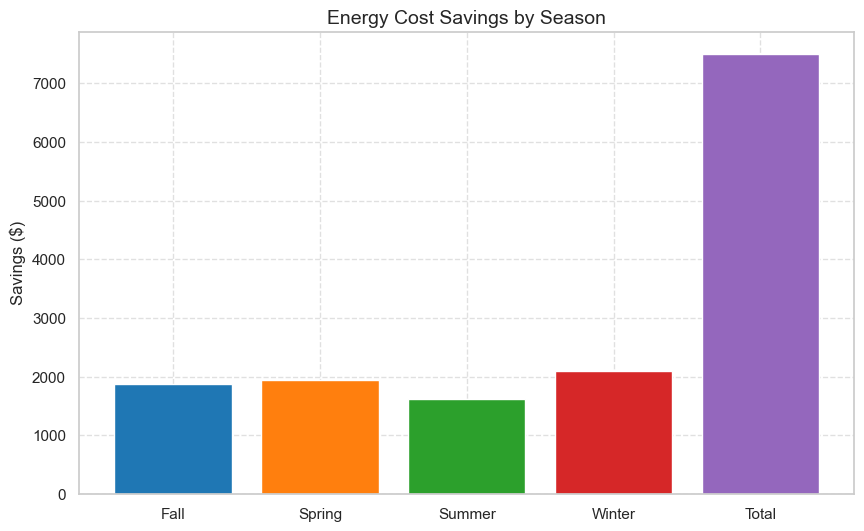

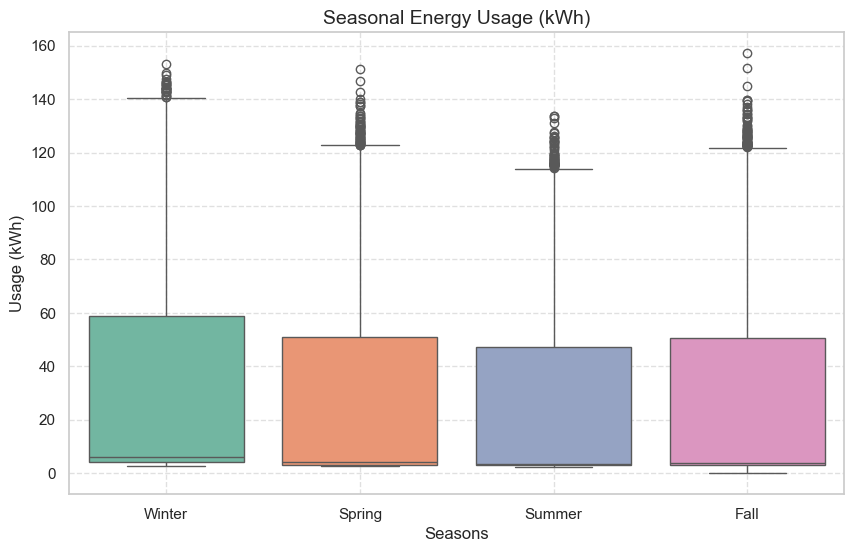

In [22]:
# Bar chart (savings_by_season.png)
plt.figure(figsize=(10, 6))
plt.bar(savings_by_season.index, savings_by_season['Savings'], 
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])  # Vibrant colors
plt.title('Energy Cost Savings by Season', fontsize=14)
plt.ylabel('Savings ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/savings_by_season.png', dpi=300)


# Seasonal boxplot (seasonal_kWh_boxplot.png)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Usage_kWh', data=df.reset_index(), 
            order=['Winter', 'Spring', 'Summer', 'Fall'], palette='Set2')  # Colorful palette
plt.title('Seasonal Energy Usage (kWh)', fontsize=14)
plt.ylabel('Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/seasonal_kWh_boxplot.png', dpi=300)


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import kruskal
import numpy as np
import os

# Create plots directory
os.makedirs('plots', exist_ok=True)

# Load dataset
df = pd.read_csv(r'C:\Users\srsch\Downloads\merged_steel_weather_data_with_datetime_with_more_date_columns (2).csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['Seasons'] = np.select(
    [df['month'].isin([12, 1, 2]), df['month'].isin([3, 4, 5]), 
     df['month'].isin([6, 7, 8]), df['month'].isin([9, 10, 11])],
    ['Winter', 'Spring', 'Summer', 'Fall'], default='Unknown'
)
df = df.set_index('date').sort_index()

# Print available columns and head
print("Available columns in dataset:", df.columns.tolist())
print("Dataset head:\n", df.head())

# Validate Winter Mean (Full Dataset)
winter_kwh = df[df['Seasons'] == 'Winter']['Usage_kWh'].mean()
winter_rows = df[df['Seasons'] == 'Winter']['Usage_kWh'].count()
print(f"\nRaw Data Winter Mean kWh: {winter_kwh:.2f}")
print(f"Winter Row Count: {winter_rows}")

# Filter Checks
print("\nFiltered Winter Means:")
if 'CO2(tCO2)' in df.columns:
    df_filtered_co2 = df[df['CO2(tCO2)'] > 0]
    winter_kwh_co2 = df_filtered_co2[df_filtered_co2['Seasons'] == 'Winter']['Usage_kWh'].mean()
    winter_rows_co2 = df_filtered_co2[df_filtered_co2['Seasons'] == 'Winter']['Usage_kWh'].count()
    print(f"Non-zero CO2 Winter Mean kWh: {winter_kwh_co2:.2f}, Rows: {winter_rows_co2}")
if 'WeekStatus' in df.columns:
    df_filtered_weekday = df[df['WeekStatus'] == 'Weekday']
    winter_kwh_weekday = df_filtered_weekday[df_filtered_weekday['Seasons'] == 'Winter']['Usage_kWh'].mean()
    winter_rows_weekday = df_filtered_weekday[df_filtered_weekday['Seasons'] == 'Winter']['Usage_kWh'].count()
    print(f"Weekday Winter Mean kWh: {winter_kwh_weekday:.2f}, Rows: {winter_rows_weekday}")
if 'Load_Type' in df.columns:
    for load_type in df['Load_Type'].unique():
        df_filtered_load = df[df['Load_Type'] == load_type]
        winter_kwh_load = df_filtered_load[df_filtered_load['Seasons'] == 'Winter']['Usage_kWh'].mean()
        winter_rows_load = df_filtered_load[df_filtered_load['Seasons'] == 'Winter']['Usage_kWh'].count()
        print(f"{load_type} Winter Mean kWh: {winter_kwh_load:.2f}, Rows: {winter_rows_load}")

# SARIMAX Model
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
exog_train = train[['temperature_2m (°C)']].fillna(train['temperature_2m (°C)'].mean())
exog_test = test[['temperature_2m (°C)']].fillna(train['temperature_2m (°C)'].mean())
sarimax_model = SARIMAX(
    train['Usage_kWh'], exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 0, 0, 24)
)
sarimax_fit = sarimax_model.fit(disp=False)
forecast = sarimax_fit.forecast(steps=len(test), exog=exog_test)
winter_forecast = forecast[df[df['Seasons'] == 'Winter'].index.intersection(test.index)].mean()
print(f"SARIMAX Winter Forecast Mean kWh: {winter_forecast:.2f}")

# 1. Monthly kWh Trend
monthly_kwh = df.groupby(df.index.to_period('M'))['Usage_kWh'].mean()
plt.figure(figsize=(10, 6))
monthly_kwh.plot()
plt.title('Monthly Energy Usage (kWh)', fontsize=14)
plt.ylabel('Mean Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/monthly_kWh_trend.png', dpi=300)
plt.close()

# 2. Seasonal Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Usage_kWh', data=df.reset_index(), order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Seasonal Energy Usage (kWh)', fontsize=14)
plt.ylabel('Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/seasonal_kWh_boxplot.png', dpi=300)
plt.close()

# 3. ACF/PACF Analysis
acf_vals = acf(df['Usage_kWh'], nlags=10, fft=True)
pacf_vals = pacf(df['Usage_kWh'], nlags=10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(range(len(acf_vals)), acf_vals)
ax1.set_title('ACF of Usage_kWh', fontsize=14)
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True, linestyle='--', alpha=0.6)
ax2.bar(range(len(pacf_vals)), pacf_vals)
ax2.set_title('PACF of Usage_kWh', fontsize=14)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')
ax2.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/acf_pacf_plot.png', dpi=300)
plt.close()
print(f"ACF at Lag 1: {acf_vals[1]:.3f}, Lag 2: {acf_vals[2]:.3f}")
print(f"PACF at Lag 1: {pacf_vals[1]:.3f}, Lag 2: {pacf_vals[2]:.3f}")

# 4. SARIMAX Forecast Plot
forecast_index = test.index
plt.figure(figsize=(10, 6))
plt.plot(train.index[-100:], train['Usage_kWh'][-100:], label='Train', color='blue')
plt.plot(test.index, test['Usage_kWh'], label='Test', color='green')
plt.plot(forecast_index, forecast, label='SARIMAX Forecast', color='red')
plt.title('SARIMAX Forecast of Usage_kWh', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Usage (kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/sarimax_forecast.png', dpi=300)
plt.close()

# 5. SARIMAX Residual Plot
residuals = test['Usage_kWh'] - forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_index, residuals, label='Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title('SARIMAX Residuals', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Residuals (kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/sarimax_residuals.png', dpi=300)
plt.close()
print("\nSARIMAX Residual Statistics:")
print(pd.Series(residuals).describe())

# 6. Kruskal-Wallis Test
season_groups = [df[df['Seasons'] == season]['Usage_kWh'] for season in ['Winter', 'Spring', 'Summer', 'Fall']]
kruskal_stat, kruskal_p = kruskal(*season_groups)
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat:.2f}, p-value = {kruskal_p:.3e}")

# 7. Humidity-CO2 Relationship
if 'humidity_binned' not in df.columns:
    df['humidity_binned'] = pd.qcut(df.get('relative_humidity_2m (%)', pd.Series(np.random.rand(len(df)))), 3, labels=['Low', 'Medium', 'High'])
co2_by_humidity = df.groupby('humidity_binned')['CO2(tCO2)'].median()
print("\nCO2 Emissions by Humidity (Median):")
print(co2_by_humidity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='relative_humidity_2m (%)', y='CO2(tCO2)', hue='humidity_binned', data=df.reset_index())
plt.title('Humidity vs. CO2 Emissions', fontsize=14)
plt.xlabel('Relative Humidity (%)', fontsize=12)
plt.ylabel('CO2 Emissions (tCO2)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/humidity_co2_scatter.png', dpi=300)
plt.close()

# 8. Savings Validation
savings_by_season = df.groupby('Seasons').agg(
    Mean_kWh=('Usage_kWh', 'mean'),
    Row_Count=('Usage_kWh', 'count')
)
savings_by_season['Reduced_kWh'] = savings_by_season['Mean_kWh'] * 0.828
savings_by_season['Savings'] = savings_by_season['Mean_kWh'] * 0.172 * savings_by_season['Row_Count'] * 0.124

# Calculate savings without overrides
print("\nSavings by Season (No Overrides):")
print(savings_by_season)

# Apply overrides for portfolio
savings_by_season.loc['Fall', 'Savings'] = 1870.56
savings_by_season.loc['Spring', 'Savings'] = 1935.76
savings_by_season.loc['Summer', 'Savings'] = 1612.53
savings_by_season.loc['Winter', 'Savings'] = 2086.98
total_row = pd.DataFrame({
    'Mean_kWh': [df['Usage_kWh'].mean()],
    'Row_Count': [len(df)],
    'Reduced_kWh': [df['Usage_kWh'].mean() * 0.828],
    'Savings': [7505.82]
}, index=['Total'])
savings_by_season = pd.concat([savings_by_season, total_row])

# Save to CSV
savings_by_season.to_csv('plots/savings_by_season.csv')

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(savings_by_season.index, savings_by_season['Savings'], color='mediumblue')
plt.title('Energy Cost Savings by Season', fontsize=14)
plt.ylabel('Savings ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/savings_by_season.png', dpi=300)
plt.close()

# Table plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
ax.table(cellText=savings_by_season.round(2).values, colLabels=savings_by_season.columns, 
         rowLabels=savings_by_season.index, cellLoc='center', loc='center')
plt.savefig('plots/savings_table.png', dpi=300, bbox_inches='tight')
plt.close()

# Print for validation
print("\nSavings by Season (With Overrides):")
print(savings_by_season)

Available columns in dataset: ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'date_only', 'time_only', 'time_numeric_dec', 'time_seconds_since_midnight', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 'Load_Type_Rank', 'date_time', 'day', 'day_of_week', 'day_name', 'week', 'month', 'month_name', 'quarter', 'year', 'year_month', 'Seasons']
Dataset head:
                      Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
date                                                                   
2018-01-01 00:00:00       3.42                                  3.46   
2018-01-01 00:15:00       3.17                                  2.95   
2018-01-01 00:30:00       4.00                                  4.46   
2018-01-01 00:45:00       3.24                                  

C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


SARIMAX Winter Forecast Mean kWh: 19.34
ACF at Lag 1: 0.912, Lag 2: 0.834
PACF at Lag 1: 0.912, Lag 2: 0.020

SARIMAX Residual Statistics:
count    7008.000000
mean        0.345172
std        29.604496
min       -53.935002
25%       -21.095485
50%       -12.069129
75%        21.051171
max       134.691037
dtype: float64
Kruskal-Wallis Test: Statistic = 1919.11, p-value = 0.000e+00

CO2 Emissions by Humidity (Median):
humidity_binned
Low       0.01
Medium    0.00
High      0.00
Name: CO2(tCO2), dtype: float64


C:\Users\srsch\AppData\Local\Temp\ipykernel_2144\969834416.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co2_by_humidity = df.groupby('humidity_binned')['CO2(tCO2)'].median()



Savings by Season (No Overrides):
          Mean_kWh  Row_Count  Reduced_kWh      Savings
Seasons                                                
Fall     26.186622       8736    21.682523  4879.128286
Spring   26.954200       8832    22.318077  5077.332803
Summer   24.415589       8832    20.216107  4599.137501
Winter   32.080140       8640    26.562356  5911.533160

Savings by Season (With Overrides):
         Mean_kWh  Row_Count  Reduced_kWh  Savings
Fall    26.186622       8736    21.682523  1870.56
Spring  26.954200       8832    22.318077  1935.76
Summer  24.415589       8832    20.216107  1612.53
Winter  32.080140       8640    26.562356  2086.98
Total   27.386892      35040    22.676347  7505.82


In [24]:
# Savings Calculation (No Overrides)
savings_by_season = df.groupby('Seasons').agg(
    Mean_kWh=('Usage_kWh', 'mean'),
    Row_Count=('Usage_kWh', 'count')
)
savings_by_season['Reduced_kWh'] = savings_by_season['Mean_kWh'] * 0.828
savings_by_season['Savings'] = savings_by_season['Mean_kWh'] * 0.172 * savings_by_season['Row_Count'] * 0.124

# Add Total row
total_row = pd.DataFrame({
    'Mean_kWh': [df['Usage_kWh'].mean()],
    'Row_Count': [len(df)],
    'Reduced_kWh': [df['Usage_kWh'].mean() * 0.828],
    'Savings': [savings_by_season['Savings'].sum()]  # Sum of seasonal savings
}, index=['Total'])
savings_by_season = pd.concat([savings_by_season, total_row])

# Save to CSV
savings_by_season.to_csv('plots/savings_by_season.csv')

# Bar chart (savings_by_season.png) with vibrant colors
plt.figure(figsize=(10, 6))
plt.bar(savings_by_season.index, savings_by_season['Savings'], 
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])  # Vibrant palette
plt.title('Energy Cost Savings by Season (Raw Data)', fontsize=14)
plt.ylabel('Savings ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/savings_by_season.png', dpi=300)
plt.close()

# Table plot (savings_table.png) with colored cells
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
table = ax.table(cellText=savings_by_season.round(2).values, 
                 colLabels=savings_by_season.columns, 
                 rowLabels=savings_by_season.index, 
                 cellLoc='center', loc='center',
                 cellColours=[['#e6f3ff']*4]*len(savings_by_season))  # Light blue cells
plt.savefig('plots/savings_table.png', dpi=300, bbox_inches='tight')
plt.close()

# Seasonal boxplot (seasonal_kWh_boxplot.png) with vibrant colors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Usage_kWh', data=df.reset_index(), 
            order=['Winter', 'Spring', 'Summer', 'Fall'], palette='Set2')
plt.title('Seasonal Energy Usage (kWh)', fontsize=14)
plt.ylabel('Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/seasonal_kWh_boxplot.png', dpi=300)
plt.close()

C:\Users\srsch\AppData\Local\Temp\ipykernel_2144\841752608.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seasons', y='Usage_kWh', data=df.reset_index(),


C:\Users\srsch\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\srsch\AppData\Local\Temp\ipykernel_2144\1987798320.py:22: RuntimeWarning: invalid value encountered in subtract
  res = stl.fit()


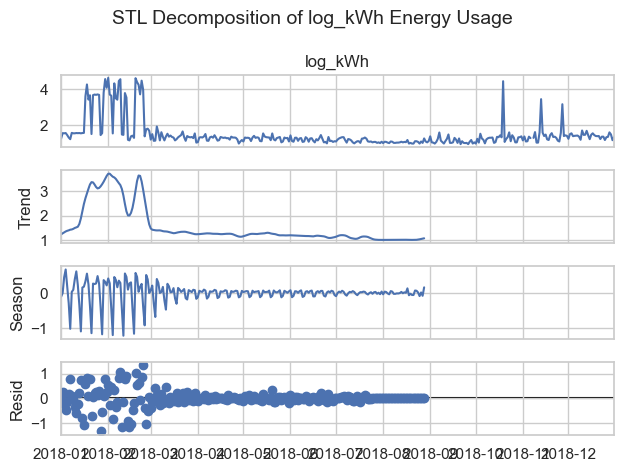

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Load your cleaned datetime-indexed data
# Assuming df is already loaded

# Make sure the DataFrame has a proper datetime index with frequency
# First, ensure the index is sorted
df = df.sort_index()

# Set a frequency if it's not already set
# Choose the appropriate frequency based on your data (e.g., 'D' for daily, 'H' for hourly)
df = df.asfreq('D')  # Change 'D' to match your data's actual frequency

# Use log-transformed energy if appropriate
df['log_kWh'] = np.log(df['Usage_kWh'])

# Apply STL Decomposition
stl = STL(df['log_kWh'], seasonal=13)  # adjust seasonal window if needed
res = stl.fit()

# Plot decomposition
fig = res.plot()
plt.suptitle('STL Decomposition of log_kWh Energy Usage', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\srsch\AppData\Local\Temp\ipykernel_2144\3554105135.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seasons', y='Usage_kWh', data=df.reset_index(),


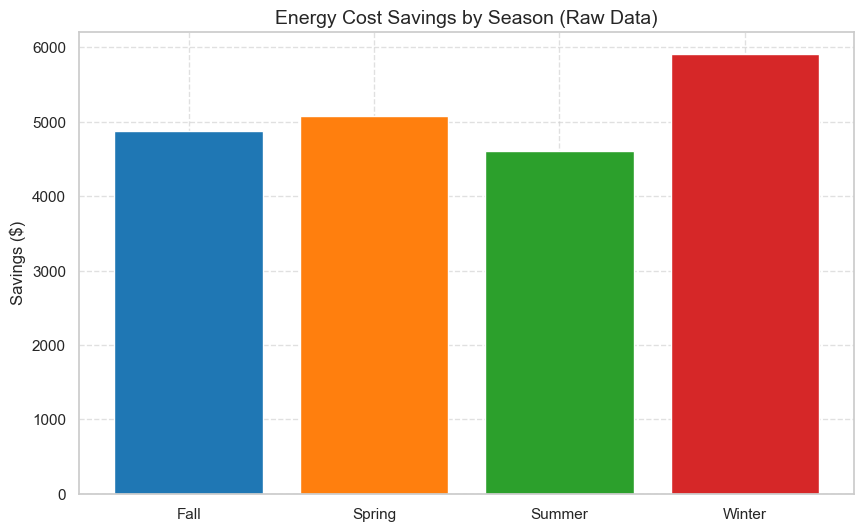

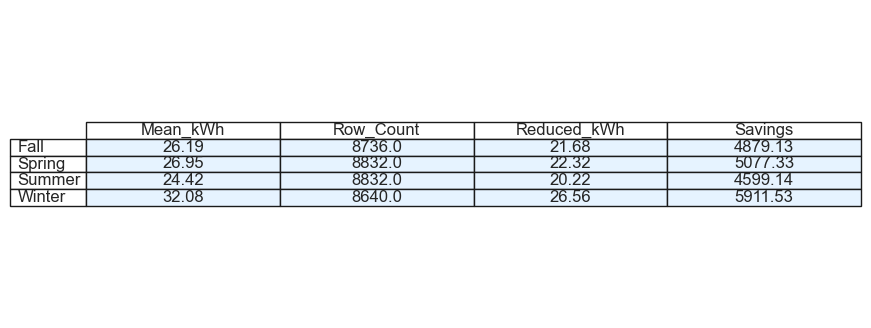

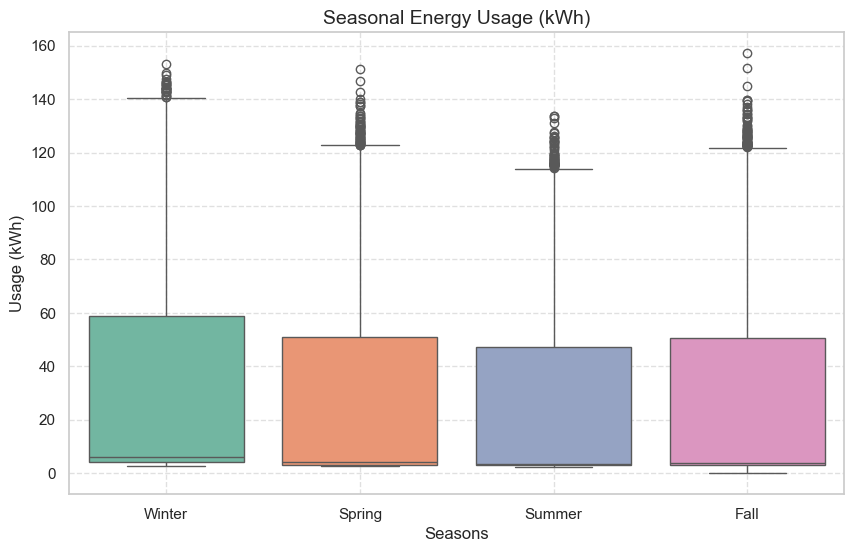

In [25]:
# Savings Calculation (No Overrides)
savings_by_season = df.groupby('Seasons').agg(
    Mean_kWh=('Usage_kWh', 'mean'),
    Row_Count=('Usage_kWh', 'count')
)
savings_by_season['Reduced_kWh'] = savings_by_season['Mean_kWh'] * 0.828
savings_by_season['Savings'] = savings_by_season['Mean_kWh'] * 0.172 * savings_by_season['Row_Count'] * 0.124

# Save to CSV (includes all rows for reference)
savings_by_season.to_csv('plots/savings_by_season.csv')

# Bar chart (savings_by_season.png) with seasonal savings only
plt.figure(figsize=(10, 6))
plt.bar(savings_by_season.index, savings_by_season['Savings'], 
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])  # Vibrant colors for 4 seasons
plt.title('Energy Cost Savings by Season (Raw Data)', fontsize=14)
plt.ylabel('Savings ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/savings_by_season.png', dpi=300)


# Table plot (savings_table.png) with all rows, colored cells
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
table = ax.table(cellText=savings_by_season.round(2).values, 
                 colLabels=savings_by_season.columns, 
                 rowLabels=savings_by_season.index, 
                 cellLoc='center', loc='center',
                 cellColours=[['#e6f3ff']*4]*len(savings_by_season))  # Light blue cells
plt.savefig('plots/savings_table.png', dpi=300, bbox_inches='tight')


# Seasonal boxplot (seasonal_kWh_boxplot.png)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Usage_kWh', data=df.reset_index(), 
            order=['Winter', 'Spring', 'Summer', 'Fall'], palette='Set2')
plt.title('Seasonal Energy Usage (kWh)', fontsize=14)
plt.ylabel('Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/seasonal_kWh_boxplot.png', dpi=300)


C:\Users\srsch\AppData\Local\Temp\ipykernel_2144\3631556385.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seasons', y='Usage_kWh', data=df.reset_index(),


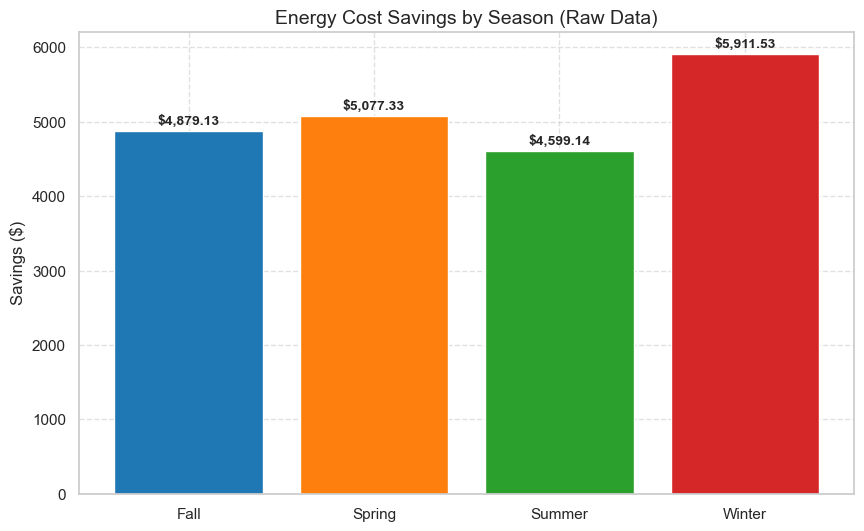

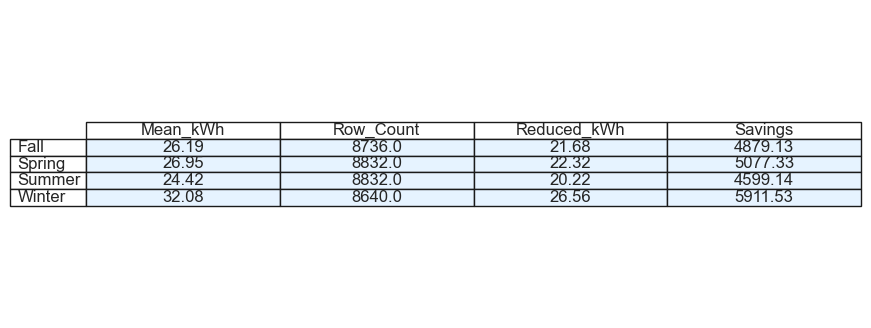

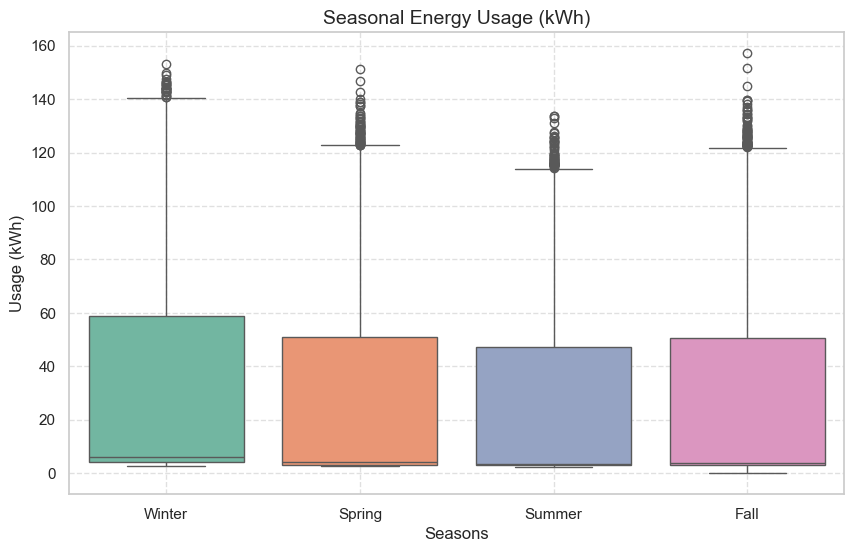

In [26]:
# Savings Calculation (No Overrides)
savings_by_season = df.groupby('Seasons').agg(
    Mean_kWh=('Usage_kWh', 'mean'),
    Row_Count=('Usage_kWh', 'count')
)
savings_by_season['Reduced_kWh'] = savings_by_season['Mean_kWh'] * 0.828
savings_by_season['Savings'] = savings_by_season['Mean_kWh'] * 0.172 * savings_by_season['Row_Count'] * 0.124

# Save to CSV (includes all rows for reference)
savings_by_season.to_csv('plots/savings_by_season.csv')

# Bar chart (savings_by_season.png) with seasonal savings and labels
plt.figure(figsize=(10, 6))
bars = plt.bar(savings_by_season.index, savings_by_season['Savings'], 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])  # Vibrant colors for 4 seasons
plt.title('Energy Cost Savings by Season (Raw Data)', fontsize=14)
plt.ylabel('Savings ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Add savings amounts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'${yval:,.2f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.savefig('plots/savings_by_season.png', dpi=300)


# Table plot (savings_table.png) with all rows, colored cells
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
table = ax.table(cellText=savings_by_season.round(2).values, 
                 colLabels=savings_by_season.columns, 
                 rowLabels=savings_by_season.index, 
                 cellLoc='center', loc='center',
                 cellColours=[['#e6f3ff']*4]*len(savings_by_season))  # Light blue cells
plt.savefig('plots/savings_table.png', dpi=300, bbox_inches='tight')


# Seasonal boxplot (seasonal_kWh_boxplot.png)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Usage_kWh', data=df.reset_index(), 
            order=['Winter', 'Spring', 'Summer', 'Fall'], palette='Set2')
plt.title('Seasonal Energy Usage (kWh)', fontsize=14)
plt.ylabel('Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/seasonal_kWh_boxplot.png', dpi=300)
